
image 1/1 /home/lunarbunny/til-24-siewsugar/advanced/images/image_1.jpg: 384x640 8 airplanes, 1 bird, 30.3ms
Speed: 1.4ms preprocess, 30.3ms inference, 4.1ms postprocess per image at shape (1, 3, 384, 640)


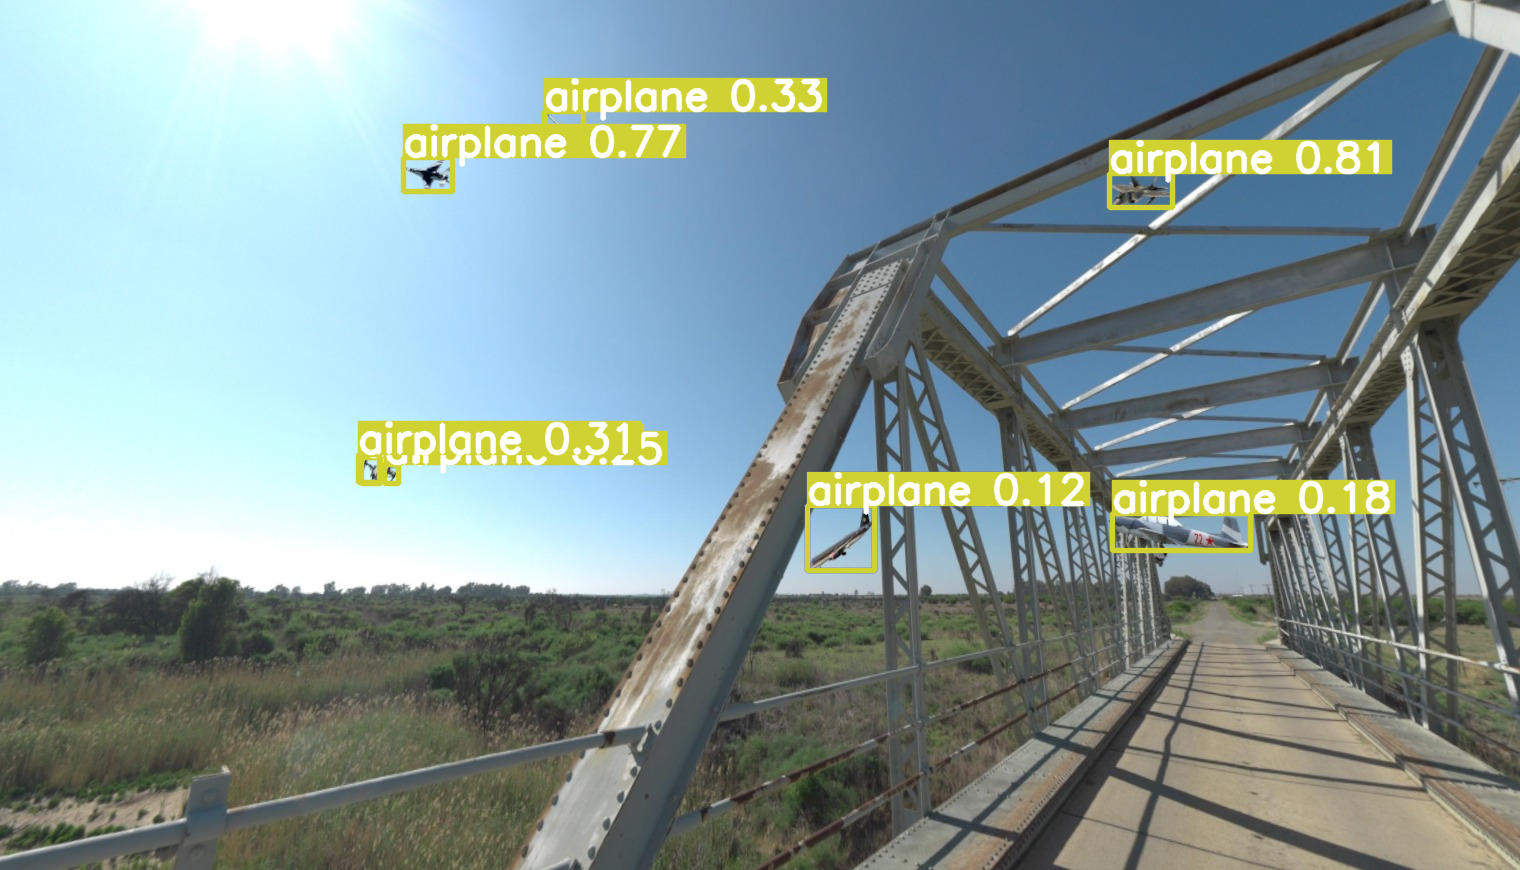

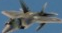

1141.1875 190.59375 62.9375 33.84375


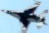

428.09375 174.859375 49.28125 33.84375


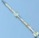

564.0625 131.0703125 39.1875 38.890625


368.71875 468.46875 20.78125 27.3125


391.28125 473.8125 14.25 19.59375


371.390625 470.84375 19.0 26.125


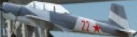

1181.5625 531.703125 137.75 37.40625


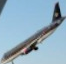

840.75 537.640625 66.5 64.71875


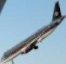

840.75 537.9375 66.5 64.125


In [12]:
from ultralytics import YOLO
from PIL import Image

# Load a model
yolo_model = YOLO("yolov8x.pt")

yolo_result = yolo_model("advanced/images/image_1.jpg", half=True, conf=0.1)[0]
yolo_objects = []
yolo_result.show() # Show annotated image

for box in yolo_result.boxes.xywh:
    # Box is a Tensor of [x, y, w, h]
    x, y, w, h = box.tolist()
    # Crop bounding boxes from orginal image
    top, left = round(y-(h/2)), round(x-(w/2))
    cropped = yolo_result.orig_img[top:int(top+h), left:int(left+w), ::-1] # BGR to RGB
    Image.fromarray(cropped).show()
    print(x, y, w, h)
    yolo_objects.append(cropped)


/home/lunarbunny/til-24-siewsugar/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


The best matching image is:


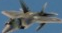

In [14]:
import torch
from transformers import CLIPProcessor, CLIPModel

MODEL = "openai/clip-vit-base-patch32"
# MODEL = "openai/clip-vit-large-patch14"

device = "cuda" if torch.cuda.is_available() else "cpu"

clip_model = CLIPModel.from_pretrained(MODEL).to(device)
clip_processor = CLIPProcessor.from_pretrained(MODEL)

caption="grey missile"
# caption="green and black missile"
caption = "grey and white fighter plane"

inputs = clip_processor(text=caption, images=yolo_objects, return_tensors="pt", padding=True).to(device)

with torch.no_grad():
    outputs = clip_model(**inputs)
logits_per_image = outputs.logits_per_image # image-text similarity score
most_similar_idx = logits_per_image.argmax(dim=0).item()

print(f"The best matching image is:")
Image.fromarray(yolo_objects[most_similar_idx]).show()

tensor([[12.9419, 19.2972, 19.3595, 15.4499, 21.3371]], grad_fn=<TBackward0>)
tensor([[1.7771e-04, 1.0229e-01, 1.0885e-01, 2.1824e-03, 7.8650e-01]], grad_fn=<SoftmaxBackward0>)
The best matching description is: [4] white and black fighter jet


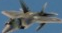

tensor([[14.2087, 23.3714, 20.0309, 17.5542, 25.4457]], grad_fn=<TBackward0>)
tensor([[1.1657e-05, 1.1114e-01, 3.9364e-03, 3.3076e-04, 8.8458e-01]], grad_fn=<SoftmaxBackward0>)
The best matching description is: [4] white and black fighter jet


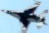

tensor([[12.6757, 14.5490, 15.6726, 13.5242, 13.9066]], grad_fn=<TBackward0>)
tensor([[0.0300, 0.1955, 0.6014, 0.0702, 0.1029]], grad_fn=<SoftmaxBackward0>)
The best matching description is: [2] white cargo aircraft


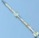

tensor([[22.9022, 20.1752, 22.2764, 20.7819, 20.8832]], grad_fn=<TBackward0>)
tensor([[0.5397, 0.0353, 0.2886, 0.0648, 0.0717]], grad_fn=<SoftmaxBackward0>)
The best matching description is: [0] yellow, red, and grey helicopter


tensor([[19.3014, 18.5631, 16.6059, 17.5669, 17.3658]], grad_fn=<TBackward0>)
tensor([[0.5358, 0.2561, 0.0362, 0.0946, 0.0773]], grad_fn=<SoftmaxBackward0>)
The best matching description is: [0] yellow, red, and grey helicopter


tensor([[20.5086, 20.8818, 19.9671, 17.5886, 22.1628]], grad_fn=<TBackward0>)
tensor([[0.1202, 0.1746, 0.0700, 0.0065, 0.6287]], grad_fn=<SoftmaxBackward0>)
The best matching description is: [4] white and black fighter jet


tensor([[17.5778, 21.4776, 21.2872, 20.2917, 20.2179]], grad_fn=<TBackward0>)
tensor([[0.0083, 0.4105, 0.3393, 0.1254, 0.1165]], grad_fn=<SoftmaxBackward0>)
The best matching description is: [1] white, red, and green fighter plane


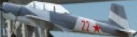

tensor([[16.4611, 16.1863, 19.2436, 16.0016, 17.7896]], grad_fn=<TBackward0>)
tensor([[0.0448, 0.0340, 0.7238, 0.0283, 0.1691]], grad_fn=<SoftmaxBackward0>)
The best matching description is: [2] white cargo aircraft


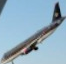

tensor([[16.6567, 16.1169, 18.9526, 15.3894, 17.9847]], grad_fn=<TBackward0>)
tensor([[0.0642, 0.0374, 0.6379, 0.0181, 0.2423]], grad_fn=<SoftmaxBackward0>)
The best matching description is: [2] white cargo aircraft


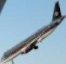

In [15]:
import torch
from transformers import CLIPProcessor, CLIPModel

yolo_model = CLIPModel.from_pretrained(MODEL)
clip_processor = CLIPProcessor.from_pretrained(MODEL)

text=["yellow, red, and grey helicopter", "white, red, and green fighter plane", "white cargo aircraft", "orange light aircraft", "white and black fighter jet"]

for obj in yolo_objects:
    inputs = clip_processor(text=text, images=obj, return_tensors="pt", padding=True)

    outputs = yolo_model(**inputs)
    logits_per_image = outputs.logits_per_image # this is the image-text similarity score
    probs = logits_per_image.softmax(dim=1) # we can take the softmax to get the label probabilities
    print(logits_per_image)
    print(probs)

    image_embeds = outputs.image_embeds
    text_embeds = outputs.text_embeds

    # Calculate cosine similarity
    cosine_sim = torch.nn.functional.cosine_similarity(image_embeds, text_embeds)
    
    # Determine the best matching text description
    best_match_idx = torch.argmax(cosine_sim).item()
    
    print(f"The best matching description is: [{best_match_idx}] {text[best_match_idx]}")
    Image.fromarray(obj).show()
